<a href="https://colab.research.google.com/github/domanowski/PJWSTK/blob/main/Projekt_zaliczeniowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as ts
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# wszystkie importy oraz wyświetlenie wersji bibliotek wykorzystywanych w Colabie (potrzebne do szukania w dokumentacji bibliotek)
print ("Numpy version: " + np.__version__)
print ("Pandas version: " + pd.__version__)
print ("Tensorflow version: " + ts.__version__)

Numpy version: 1.26.4
Pandas version: 2.2.2
Tensorflow version: 2.18.0


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Studia PJATeK/Projekt zaliczeniowy/KDD_Cup_1999.csv.gz")
df.info()
df.describe()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal


In [ ]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
df.select_dtypes(include=['object']).apply(pd.unique)

,0
protocol_type,"[tcp, udp, icmp]"
service,"[http, smtp, finger, domain_u, auth, telnet, f..."
flag,"[SF, S1, REJ, S2, S0, S3, RSTO, RSTR, RSTOS0, ..."
outcome,"[normal, buffer_overflow, loadmodule, perl, ne..."


In [ ]:
#Let's conver all int64 type data to float64 for better consistency
df = df.astype({col: 'float64' for col in df.select_dtypes(include=['int64']).columns})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  float64
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  float64
 5   dst_bytes                    494021 non-null  float64
 6   land                         494021 non-null  float64
 7   wrong_fragment               494021 non-null  float64
 8   urgent                       494021 non-null  float64
 9   hot                          494021 non-null  float64
 10  num_failed_logins            494021 non-null  float64
 11  logged_in                    494021 non-null  float64
 12  num_compromised              494021 non-null  float64
 13 

In [ ]:
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
494016,False
494017,False
494018,False
494019,False


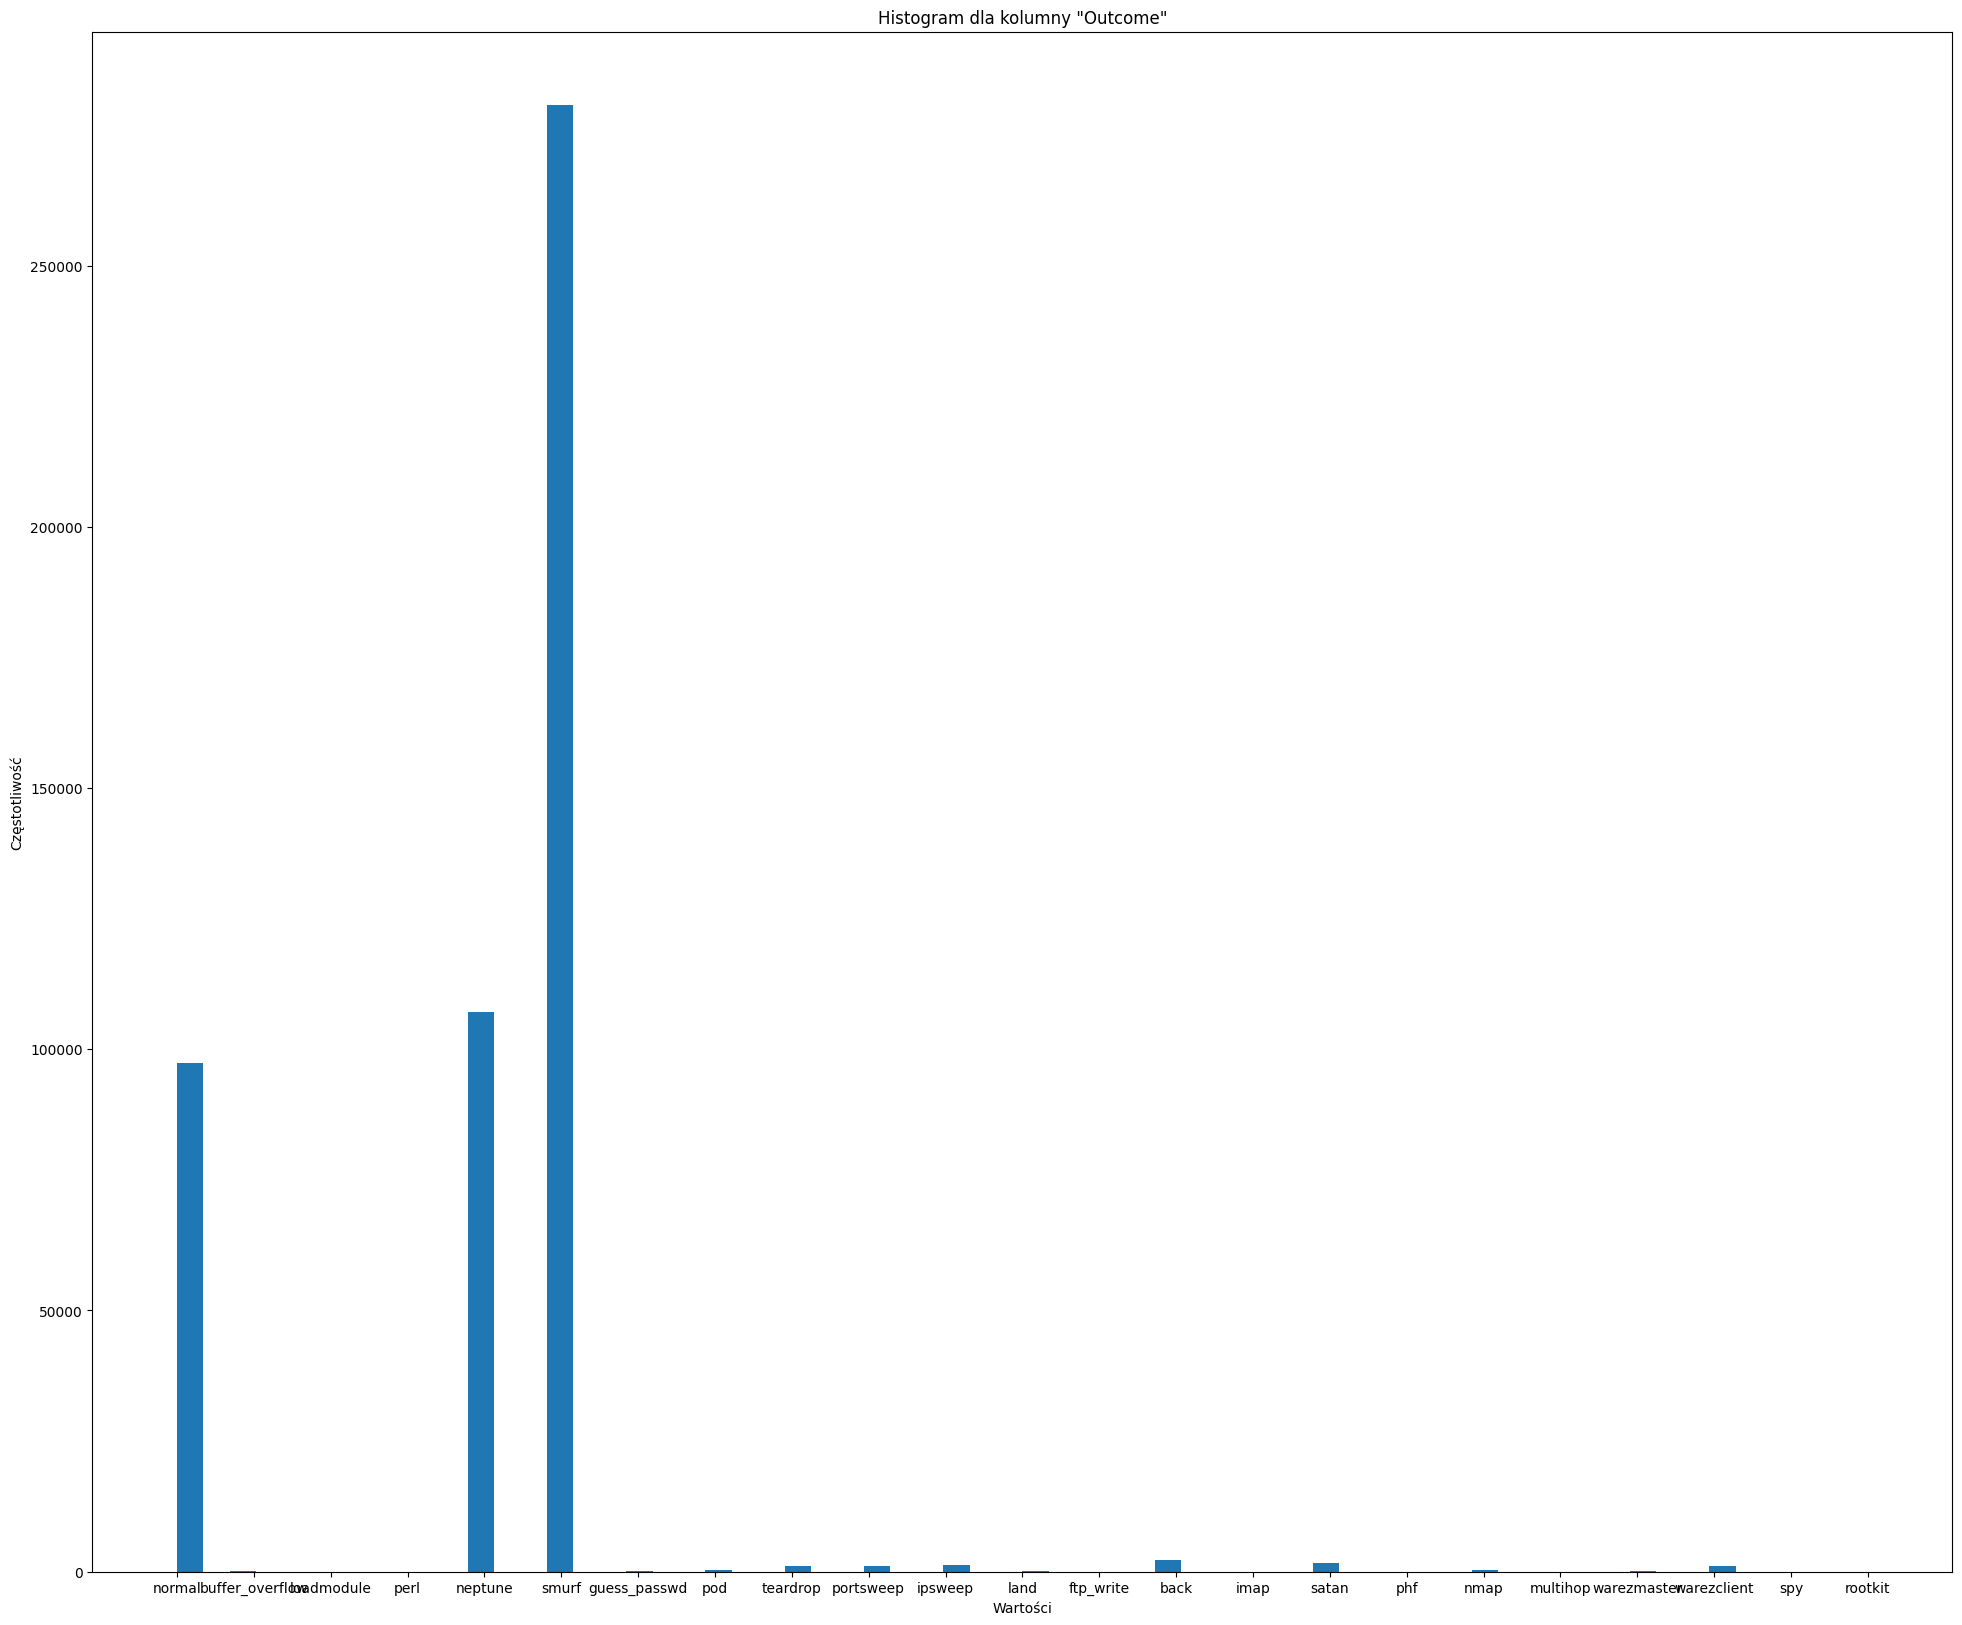

In [ ]:
plt.figure(figsize=(24, 20))
plt.hist(df['outcome'], bins=64) # df to Twoja ramka danych, 'kolumna' to nazwa kolumn
plt.xlabel('Wartości')
plt.ylabel('Częstotliwość')
plt.title('Histogram dla kolumny "Outcome"')
plt.show()

In [ ]:
#Let's remove all columns with only 1 and the same value in each row
df = df.drop(columns = [col for col in df.columns if df[col].nunique() == 1])
df = df.astype({col: 'float64' for col in df.select_dtypes(include=['int64']).columns})

In [ ]:
df['outcome'].unique()


array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

brief characterization of each type of the traffic:

*   **normal:** Regular, non-malicious network traffic.

*   **buffer_overflow:** Exploiting buffer overflow vulnerabilities to execute arbitrary code.

*   **loadmodule:** Loading and executing a malicious module.

*   **perl:** Using Perl scripts to exploit vulnerabilities.

*   **neptune:** A type of Denial of Service (DoS) attack.

*   **smurf:** A type of DoS attack using spoofed broadcast packets.

*   **guess_passwd:** Attempting to guess passwords.

*   **pod:** A type of DoS attack using fragmented packets.

*   **teardrop:** Sending fragmented packets to cause reassembly errors.

*   **portsweep:** Scanning multiple ports on a host to find open ones.

*   **ipsweep:** Scanning multiple hosts to find open ports.

*   **land:** Sending a specially crafted TCP packet to crash a system.

*   **ftp_write:** Exploiting FTP to upload malicious files.

*   **back:** A type of DoS attack.

*   **imap:** Exploiting IMAP vulnerabilities.

*   **satan:** A type of network scanning attack.

*   **phf:** Using a proxy to hide the source of an attack.

*   **nmap:** Network mapping tool used for scanning.

*   **multihop:** Exploiting vulnerabilities through multiple hosts.

*   **warezmaster:** Distributing pirated software.

*   **warezclient:** Downloading pirated software.

*   **spy:** Monitoring network traffic.

*   **rootkit:** Installing software to gain unauthorized access and control.

we can observer that he largest amont of tafic was generated by Smurf and Neptune type of attacks. It is becouse:


1.   **Smurf Attack:** This is a type of Distributed Denial of Service (DDoS) attack(1). It involves sending a large number of ICMP (Internet Control Message Protocol) echo requests to a network's broadcast address with a spoofed source IP address(2). Every device on the network responds to the spoofed IP address, flooding it with traffic(2). This amplifies the attack significantly, leading to a massive amount of traffic(2).
2.   **Neptune Attack:** This is another type of DDoS attack, but it typically involves sending a large number of SYN (synchronize) packets to overwhelm a target system(3). While it can generate substantial traffic, it doesn't amplify as much as a Smurf attack because it doesn't exploit the network's broadcast nature(2).


(1) www.fortinet.com
(2) www.sangfor.com
(3) www.imperva.com

In [ ]:
def ohe(df, columnName):
  ohe = OneHotEncoder(sparse_output=False)
  dec_ohe = ohe.fit_transform(df[[columnName]])
  cols = ohe.get_feature_names_out()
  df_ohe = pd.DataFrame(dec_ohe, columns = cols)
  df = df.drop(columns = [columnName])
  df_return = pd.concat([df, df_ohe], axis='columns')

  return df_return

In [ ]:
df1 = df.copy()
for col in ['protocol_type', 'service', 'flag']:
  df1 = ohe(df1, columnName=col)
df1.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,0.054401,0.001172,0.000022,0.001828,0.176120,0.000115,0.000049,0.000020,0.766040,0.000217
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,0.226807,0.034215,0.004719,0.042714,0.380923,0.010741,0.006970,0.004499,0.423347,0.014715
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


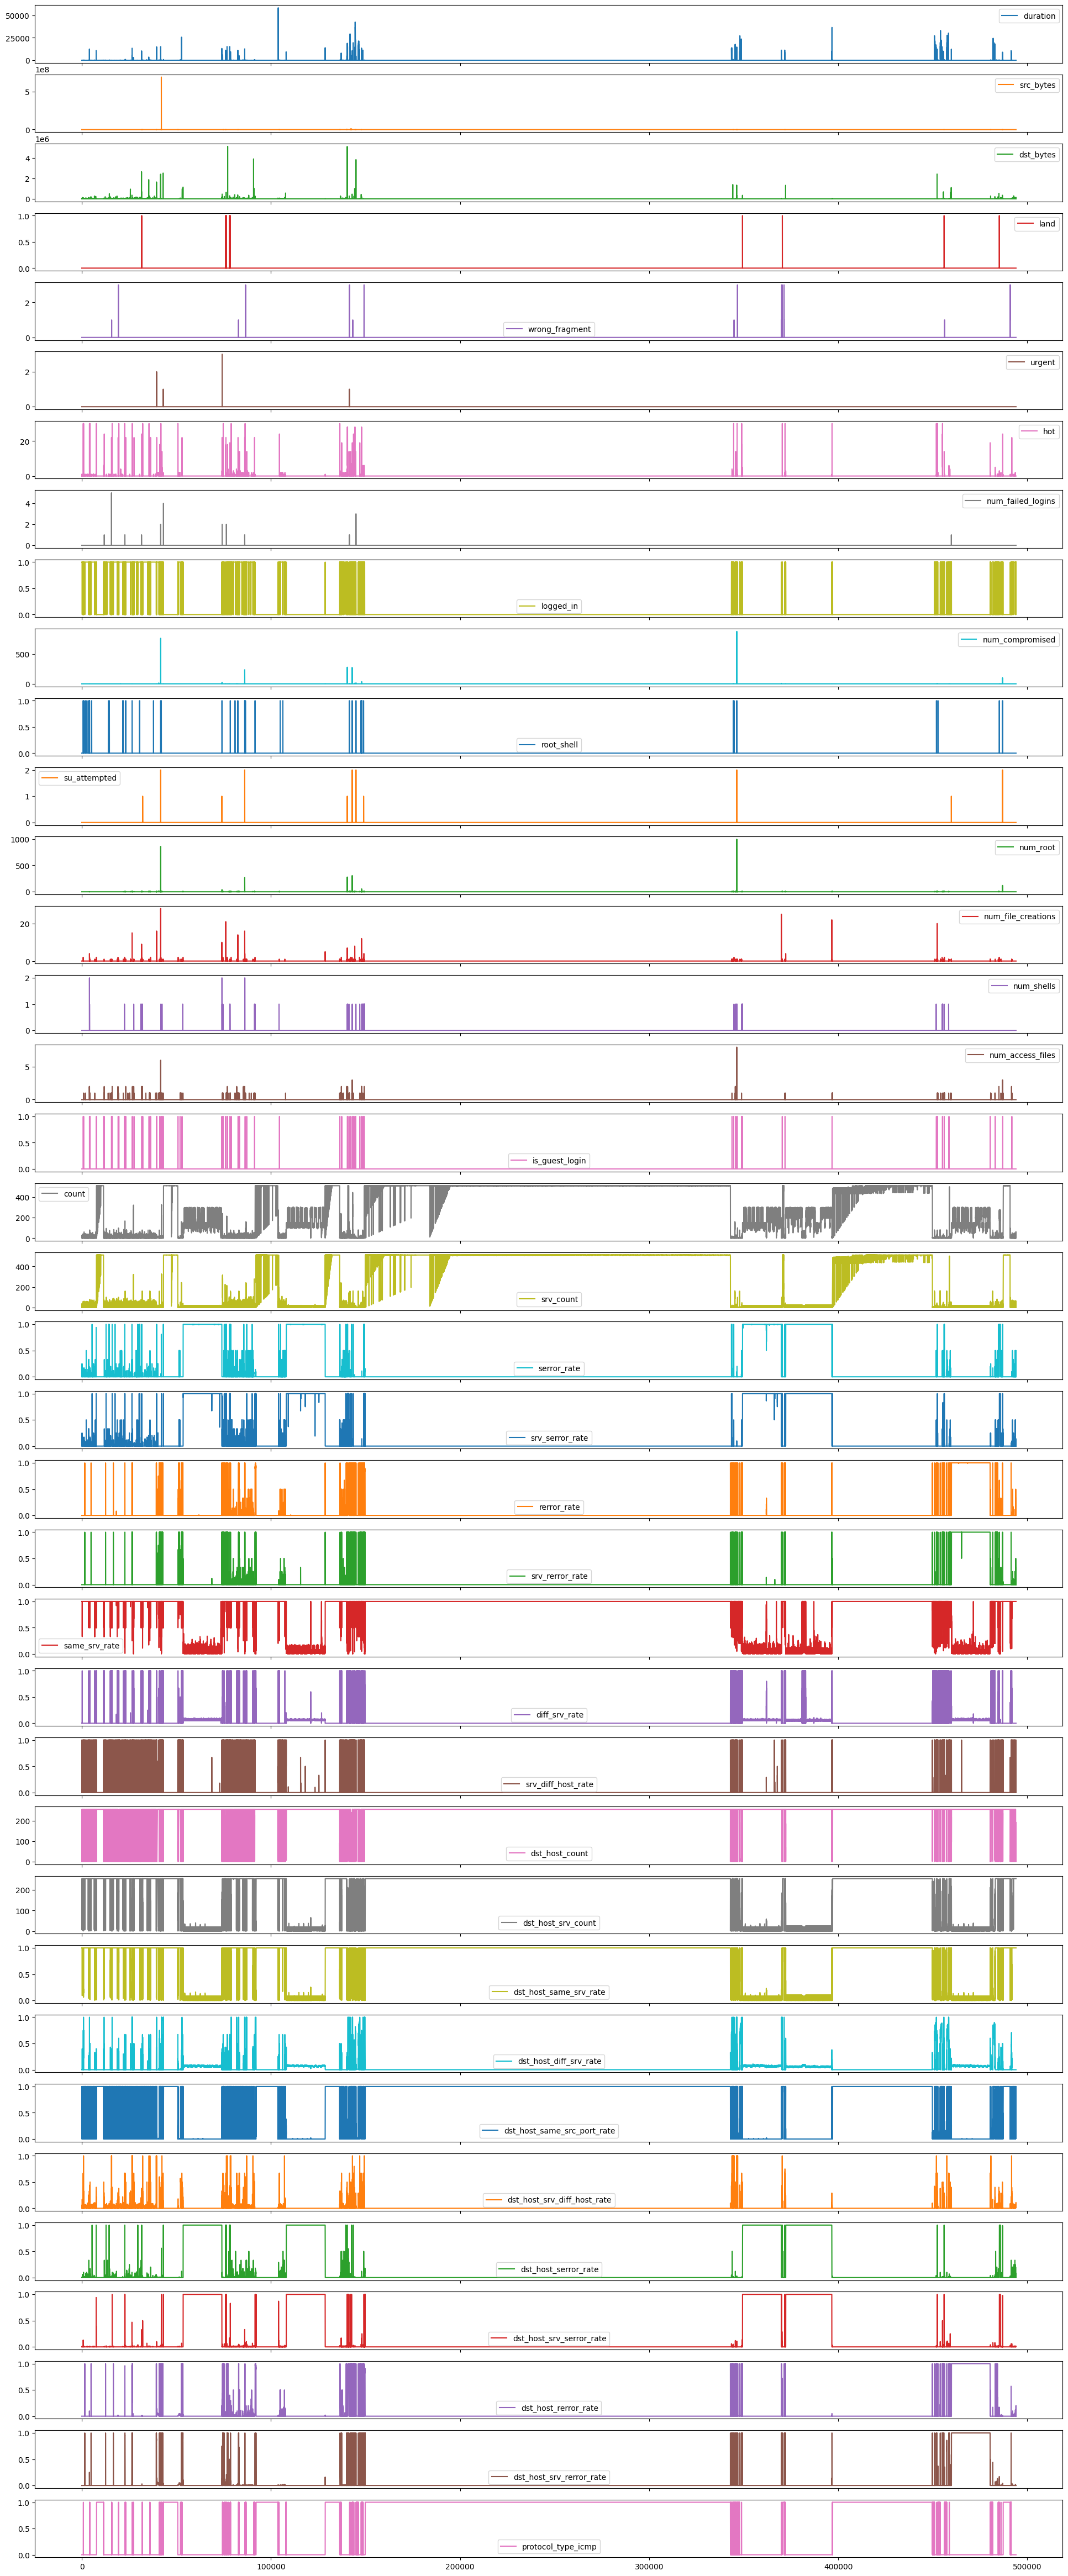

In [ ]:
ax1 = df1.iloc[:, :38].plot(figsize=(24, 60), subplots=True)

In [ ]:
df_prep = df1.copy()
minmaxscaler = MinMaxScaler()
columns_to_scale = df1.columns[df1.columns != 'outcome']
df_prep[columns_to_scale] = minmaxscaler.fit_transform(df_prep[columns_to_scale])

In [ ]:
df_prep.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,494021.000000,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,0.000823,4.363595e-06,0.000168,0.000045,0.002144,0.000005,0.001151,0.000030,0.148247,0.000012,...,0.054401,0.001172,0.000022,0.001828,0.176120,0.000115,0.000049,0.000020,0.766040,0.000217
std,0.012134,1.425228e-03,0.006409,0.006673,0.044935,0.001837,0.026070,0.003104,0.355345,0.002034,...,0.226807,0.034215,0.004719,0.042714,0.380923,0.010741,0.006970,0.004499,0.423347,0.014715
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.489989e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,7.499542e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.488371e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_train, df_test = train_test_split(df_prep, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Index: 395216 entries, 133888 to 121958
Columns: 117 entries, duration to flag_SH
dtypes: float64(116), object(1)
memory usage: 355.8+ MB
